<a href="https://colab.research.google.com/github/ZKisielewska/learning-git-task/blob/master/M_13_5_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Calculate the remaining metrics for last created model (for numeric and categorical features), make a visual assessment and then compare the last model with the first one we created.

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [54]:
# download data
bike_data_raw = pd.read_csv('https://uploads.kodilla.com/bootcamp/ds/13/daily-bike-share.csv')
bike_data_raw.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [55]:
# convert 'dteday' into datatime type
bike_data_raw['dteday'] = pd.to_datetime(bike_data_raw['dteday'])
bike_data_raw.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [56]:
# create 'bike_data' copy and droped selected columns
bike_data = bike_data_raw.copy()
bike_data.drop(['instant', 'dteday', 'yr'], axis=1, inplace=True)
bike_data.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [57]:
# craete numeric and categorical features and target
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit']
target = 'rentals'

In [58]:
# add new variable 'difference_temp' and drop 'atemp', update numeric_features
bike_data['difference_temp'] = (bike_data['atemp'] - bike_data['temp'])/bike_data['temp']
bike_data.drop(['atemp'], axis=1, inplace=True)
numeric_features = ['temp', 'difference_temp', 'hum', 'windspeed']

## **Linear Regression**
The number of rented bikes is most dependent on the temperature on a given day. We create a model based on this variable. Our **X** will be temp and **y** will be rentals.

In [59]:
from sklearn import linear_model
# create Lnear Regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression

# define X and y variables
X = bike_data[['temp']].copy()
y = bike_data[target].copy()

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [60]:
# chack the trained parameters
intercept = lr_model.intercept_
print(intercept)
coef = lr_model.coef_
print(coef)

-179.96286312537404
[1990.31869846]


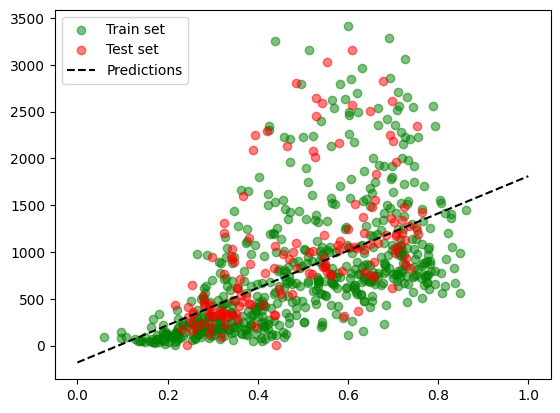

In [61]:
# model vizualizatiom
import numpy as np
X_linspace = np.linspace(0, 1, 100)
y_fitted = intercept + coef * X_linspace

plt.scatter(X_train, y_train, color='g', alpha=0.5, label='Train set')
plt.scatter(X_test, y_test, color='r', alpha=0.5, label='Test set')
plt.plot(X_linspace, y_fitted, color='black', ls='--', label='Predictions')
plt.legend(loc='upper left')

plt.show()

For the smallest possible temperature value, the forecast may be lower than 0.

In [62]:
# prediction for new data
X_new = [[0.3],
         [0.7]]

predicted_data = np.round(lr_model.predict(X_new), 0)
predicted_data

array([ 417., 1213.])

We have already trained the first model, so now we can evaluate it. We create predictions for the training and test sets, next we calculate metrics which aggregate predictions with true values into a single number.

In [63]:
y_predict_train = lr_model.predict(X_train)
y_predict_test = lr_model.predict(X_test)

In [64]:
# Coefficient of determination (r2_score)
from sklearn.metrics import r2_score
print(f'Train R^2: {r2_score(y_train, y_predict_train)}')

Train R^2: 0.30617863454631344


R2 values close to 1 correspond to a good fit of the model, and values close to 0 indicate an unsatisfactory fit. We can see that our model is not fit well.

In [65]:
# MAE - Mean Absolute Error - for training and test sets
from sklearn.metrics import mean_absolute_error
print(f'Train MAE: {mean_absolute_error(y_train, y_predict_train)}')
print(f'Test MAE: {mean_absolute_error(y_test, y_predict_test)}')

Train MAE: 404.8339599752615
Test MAE: 391.02879410802956


On average, our model is off by 404 bikes.

In [66]:
# MAPE - Mean Absolute Percentage Error
from sklearn.metrics import mean_absolute_percentage_error
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, y_predict_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(y_test, y_predict_test)}')

Train MAPE: 0.9668581511778538
Test MAPE: 2.9864925318560496


The model is wrong by an average of 300%.

In [67]:
# MSE - Mean Squared Error
from sklearn.metrics import mean_squared_error
print(f'Train MSE: {mean_squared_error(y_train, y_predict_train)}')
print(f'Test MSE: {mean_squared_error(y_test, y_predict_test)}')

Train MSE: 317745.94124252343
Test MSE: 397066.9447179113


Values are not understandable, difficult to interpret.

In [68]:
# RMSE – Root Mean Squared Error
from math import sqrt
print(f'Train RMSE: {sqrt(mean_squared_error(y_train, y_predict_train))}')
print(f'Test RMSE: {sqrt(mean_squared_error(y_test, y_predict_test))}')

Train RMSE: 563.6895787953894
Test RMSE: 630.1324818781454


The result shows the scale of large errors.

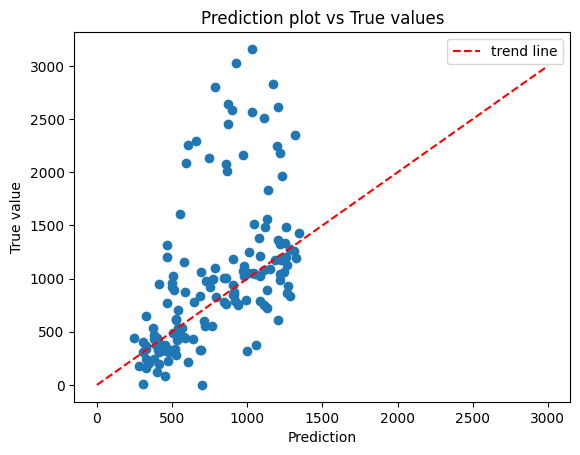

In [69]:
# compare the true value with the prediction
plt.scatter(y_predict_test, y_test)

X_linspace = np.linspace(0, 1, 100)
X_new = X_linspace * 3000
plt.plot(X_new, X_new, color='red', ls='--',  label='trend line')

plt.xlabel('Prediction')
plt.ylabel('True value')
plt.title('Prediction plot vs True values')
plt.legend(loc=0)
plt.show()

For a true value, the model underestimates high values.

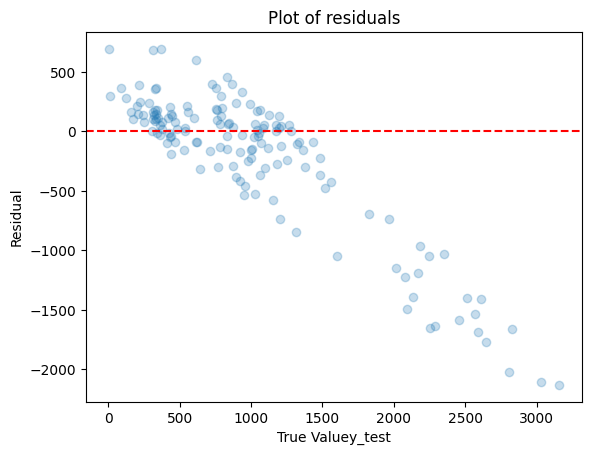

In [70]:
# residual plot
errors = y_predict_test - y_test
plt.scatter(x = y_test, y = errors, alpha=0.25)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel('True Valuey_test')
plt.ylabel('Residual')
plt.title(f'Plot of residuals')
plt.show()

The relationship is very noticeable in the graph above. The higher the true values, the more the model underestimates.

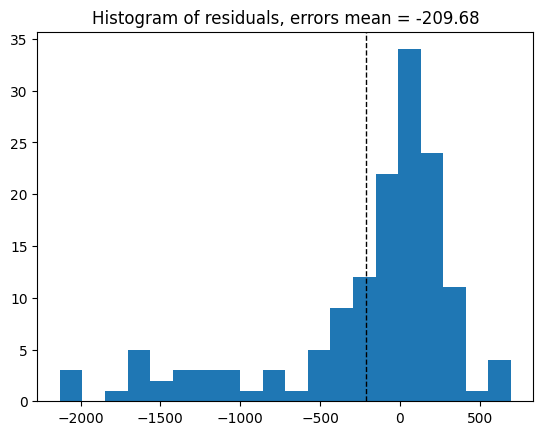

In [71]:
# histogram of residuals
plt.hist(errors, bins = 20)
plt.axvline(errors.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title(f'Histogram of residuals, errors mean = {np.round(errors.mean(), 2)}')
plt.show()

We can see that the model enderestimates in left side, skew left side.

## **Polynomial regression**
For each polynomial, we will compute **R2** and the **RMSE** for the training set and the **RMSE** for the test set.

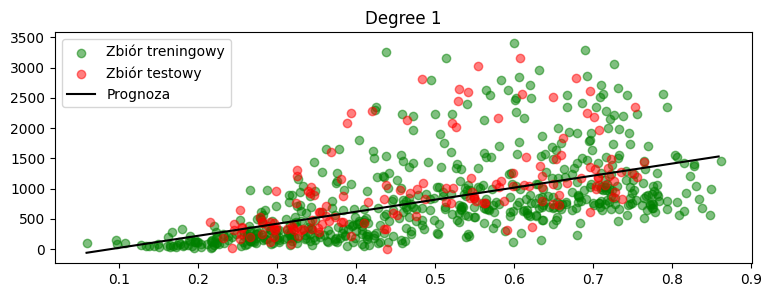

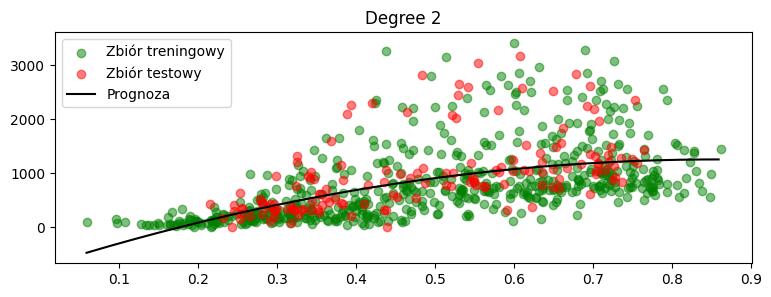

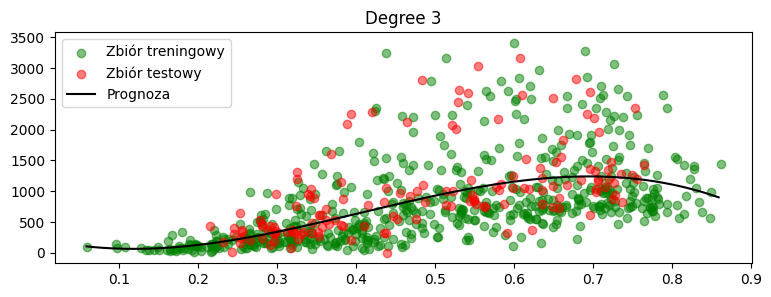

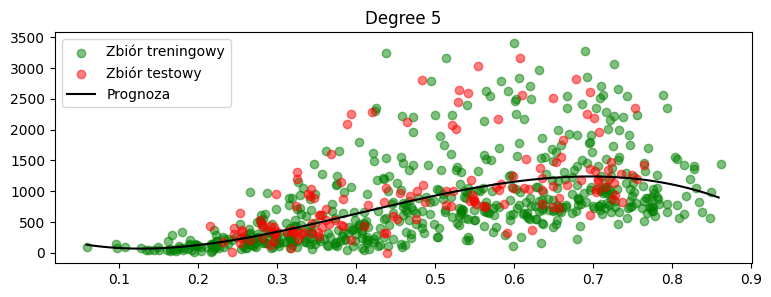

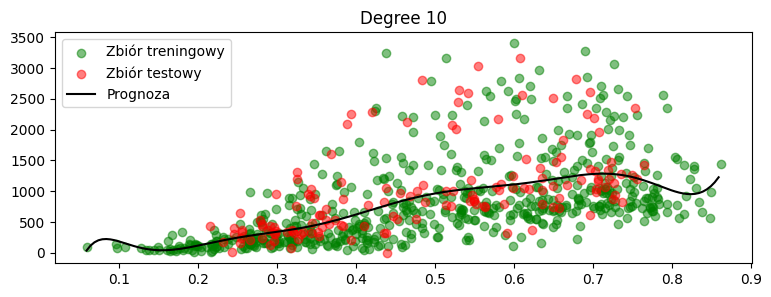

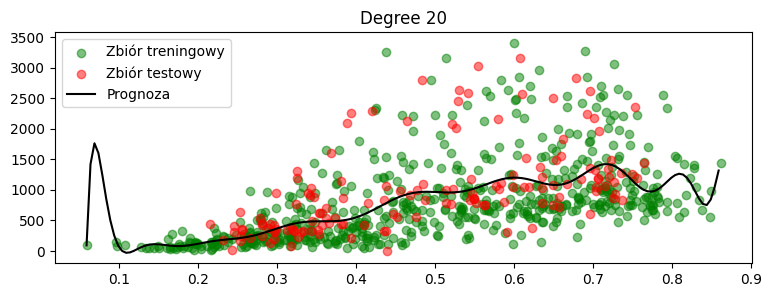

In [72]:
from sklearn.preprocessing import PolynomialFeatures

# create ampty list for metrics
r_2_train_list = []
rmse_train_list = []
rmse_test_list = []

# create X used for model vizualization
X_linespace = np.arange(X.min()[0], X.max()[0], step=0.005).reshape(-1, 1)
for degree in [1, 2, 3, 5, 10, 20]:

    # X transformation
    poly_transformer = PolynomialFeatures(degree=degree)
    X_train_transformed = poly_transformer.fit_transform(X_train)

    # model training
    polynomial_regression = LinearRegression()
    polynomial_regression.fit(X_train_transformed, y_train)
    plt.figure(figsize=(9, 3))

    # training and test sets vizualization
    plt.scatter(X_train, y_train, color='green', alpha=0.5, label='Zbiór treningowy')
    plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Zbiór testowy')

    # polynomial vizualization
    y_fitted = polynomial_regression.predict(poly_transformer.transform(X_linespace))
    plt.plot(X_linespace, y_fitted, color='black', label='Prognoza')
    plt.title(f'Degree {degree}')
    plt.legend(loc='upper left')
    plt.show()

    # training set prediction
    prediction_train = polynomial_regression.predict(X_train_transformed)

    # test set prediction
    X_test_transformed = poly_transformer.transform(X_test)
    prediction_test = polynomial_regression.predict(X_test_transformed)

    # model evaluation
    r_2_train_list.append(r2_score(y_train, prediction_train))
    rmse_train_list.append(sqrt(mean_squared_error(y_train, prediction_train)))
    rmse_test_list.append(sqrt(mean_squared_error(y_test, prediction_test)))

The model learns the noise, overtrains, and thus cannot generalize.

We will check the metrics for the training and test sets depending on the degree of the polynomial.

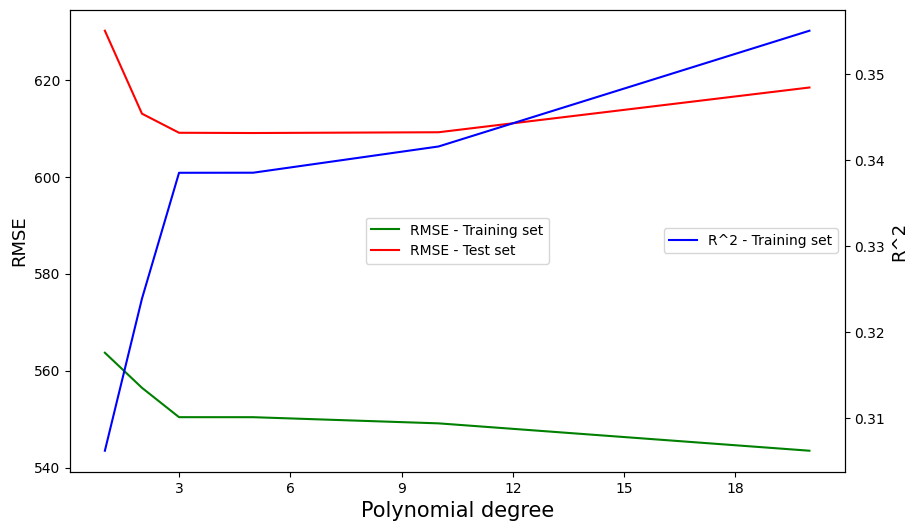

In [73]:
from matplotlib.ticker import MaxNLocator
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()
ax.plot([1, 2, 3, 5, 10, 20], rmse_train_list, color='green', label='RMSE - Training set')
ax.plot([1, 2, 3, 5, 10, 20], rmse_test_list, color='red', label='RMSE - Test set')
ax.legend(loc='center')
ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # Ustawienie typu int dla wartości z osi X
ax.set_ylabel('RMSE', size=13)
ax.set_xlabel('Polynomial degree', size=15)

# Dodanie drugiej osi y dla R^2
ax2=ax.twinx()
ax2.plot([1, 2, 3, 5, 10, 20], r_2_train_list, color='blue', label='R^2 - Training set')
ax2.legend(loc='center right')
ax2.set_ylabel('R^2', size=13)

plt.show()

As the degree of the polynomial increases, the metrics for the training and test sets are minimized, but up to a certain point, from which the results for the test set are getting worse. From this point on, the model learns the noise from the training set.

### **Cross Validation**

In [74]:
# Validation set - cross-validation
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=False)

We check all combinations of submitted hyperparameters and choose those that give the best average result from the validation sets

In [75]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# create Pipeline - create polynomial first, next train the model
polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(),
                                               LinearRegression())

# model chack below parameters
params = {'polynomialfeatures__degree': [1, 2, 3, 4, 5]}

# Pipeline initialize
polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline,
                                                params,
                                                scoring='neg_mean_squared_error',
                                                cv=cv)

# train Grid Search, give X_train - Pipeline create polynomial
polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nBest hiperparameters:", polynomial_regression_gridsearch.best_params_, "\n")

# pass the best estimator
polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_
predictions = polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')


Best hiperparameters: {'polynomialfeatures__degree': 3} 

RMSE: 609.076780249834


We can see that the model improve the results from 630 to 609 bikes.

### **Multivariate regression**

We add all numeric features to X.

In [76]:
# split into independent variable and dependent variable
X = bike_data[numeric_features].copy()
y = bike_data[target].copy()

# create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# model training
polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(),
                                               LinearRegression())
params = {'polynomialfeatures__degree': [1, 2, 3, 4, 5]}
polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline,
                                                params,
                                                scoring='neg_mean_squared_error',
                                                cv=cv)

polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nBest hiperparameters:", polynomial_regression_gridsearch.best_params_, "\n")

polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_
predictions = polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')


Best hiperparameters: {'polynomialfeatures__degree': 1} 

RMSE: 618.1519697010564


Unfortunately, we can see that the model decrease the rusults. We can use Regularization to improve the model.

In [77]:
# import linear regression with Lasso and Ridge regularization
from sklearn.linear_model import ElasticNet

# model training
polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(),
                                               ElasticNet())

params = {'polynomialfeatures__degree': [1, 2, 3, 4, 5],
          'elasticnet__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
          'elasticnet__l1_ratio': np.arange(0, 1.1, 0.1)}

polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline,
                                                params,
                                                scoring='neg_mean_squared_error',
                                                cv=cv)

polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nBest hiperparameters:", polynomial_regression_gridsearch.best_params_, "\n")

polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_
predictions = polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')


Best hiperparameters: {'elasticnet__alpha': 1.0, 'elasticnet__l1_ratio': 1.0, 'polynomialfeatures__degree': 5} 

RMSE: 584.8854667922697


The results improved after using Elastic Net regularization.

### **Categorical features**

We add Categorical features to the model

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# split into independent variable and dependent variable
X = bike_data[numeric_features+categorical_features].copy()
y = bike_data[target].copy()

# create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
numeric_transformer = Pipeline(steps=[
    ('logtransformer', PowerTransformer()),
    ('standardscaler', StandardScaler()),
    ('polynomialfeatures', PolynomialFeatures())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# create final Pipeline that will be trained
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', ElasticNet())])

params = {'preprocessor__num__polynomialfeatures__degree': [1, 2, 3, 4, 5],
          'regressor__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
          'regressor__l1_ratio': np.arange(0, 1.1, 0.1)}

final_polynomial_regression_gridsearch = GridSearchCV(final_pipeline,
                                                      params,
                                                      scoring='neg_mean_squared_error',
                                                      cv=cv)

final_polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nBest hiperparameters:", final_polynomial_regression_gridsearch.best_params_, "\n")

final_polynomial_regression_model = final_polynomial_regression_gridsearch.best_estimator_
predictions = final_polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')


Best hiperparameters: {'preprocessor__num__polynomialfeatures__degree': 1, 'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.4} 

RMSE: 483.9379414050111


### We calculate **the remain metrics** for final_polynomial model.

In [91]:
# r2_score
print(f'R^2: {r2_score(y_test, predictions)}')

R^2: 0.5246818862090766


Final_polynomial model shows the higher proportion of the variance in the dependent variable that is explained by the independent variable. R-squared value is at 0.52 while linear regression shows the value at 0.30.

In [92]:
# MAE - Mean Absolute Error
print(f'MAE: {mean_absolute_error(y_test, predictions)}')

MAE: 348.58519355155653


On average, linear regression model is off by 404 bikes while final_polynomial one is off 348 bikes.

In [93]:
# MAPE - Mean Absolute Percentage Error
print(f'MAPE: {mean_absolute_percentage_error(y_test, predictions)}')

MAPE: 0.8593319730028242


The final_polynomial_model is wrong by an average of 85% while linear regression one is wrong by close 300%.

In [94]:
# MSE - Mean Squared Error
print(f'MSE: {mean_squared_error(y_test, predictions)}')

MSE: 234195.93113131993


### **Visual evaluation** of the final_polynomial model.

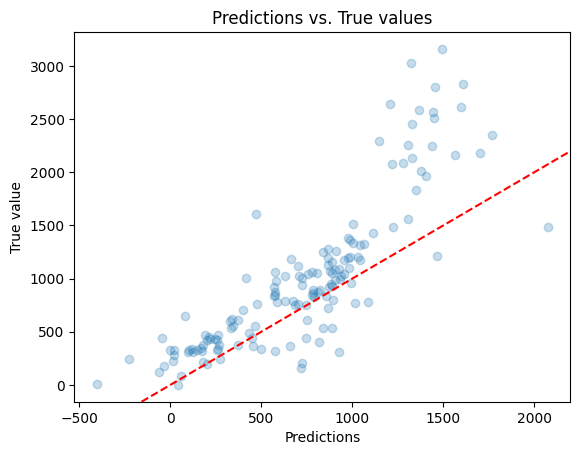

In [97]:
plt.scatter(predictions, y_test, alpha=0.25)
plt.axline((0,0), slope=1, color='r', ls='--')
plt.xlabel('Predictions')
plt.ylabel('True value')
plt.title('Predictions vs. True values')
plt.show()

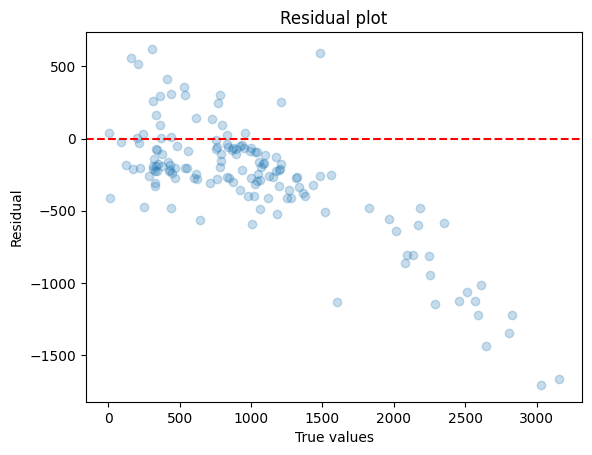

In [98]:
errors = predictions - y_test
plt.scatter(y_test, errors, alpha=0.25)
plt.axhline(0, color='r', ls='--')
plt.xlabel('True values')
plt.ylabel('Residual')
plt.title('Residual plot')
plt.show()

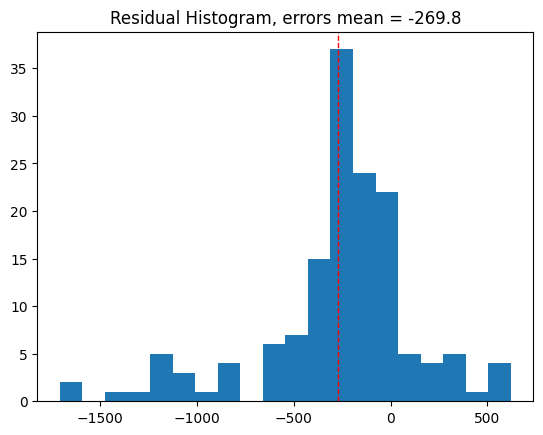

In [99]:
plt.hist(errors, bins=20)
plt.axvline(errors.mean(), color='r', ls='--', linewidth=1)
plt.title(f'Residual Histogram, errors mean = {np.round(errors.mean(), 2)}')
plt.show()

We can see that final_polynomial model generalize better results than linear_regression one. However, the polynomial_model still underestimates high values for a true value. We are dealing with a lot of errors and left side skewness.